In [12]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [15]:
raw = pd.read_csv("/content/gas_turbines (1).csv")
raw.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [16]:
#TEY is the variable we should predict.
df = raw.copy()
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [18]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [19]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [21]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [29]:
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)
len(xtrain_scale)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


10527

In [31]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 2s 17ms/step - loss: 0.0754 - mse: 0.0754 - mae: 0.2107 - val_loss: 0.0465 - val_mse: 0.0465 - val_mae: 0.1574
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1560 - val_loss: 0.0457 - val_mse: 0.0457 - val_mae: 0.1514
Epoch 3/100
48/48 [==============================] - 1s 11ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1546 - val_loss: 0.0455 - val_mse: 0.0455 - val_mae: 0.1516
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1533 - val_loss: 0.0459 - val_mse: 0.0459 - val_mae: 0.1575
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0466 - mse: 0.0466 - mae: 0.1584 - val_loss: 0.0454 - val_mse: 0.0454 - val_mae: 0.1535
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1554 - val_loss: 0.0451 - val_mse: 0.0451 - val_mae: 0.1518
Epoch 7/100
48/48 [

In [32]:
#At epoch 50, mse and mae just keeps oscillating back a
model1.summary()
y_predict = model1.predict(xtest_scale)
print(hist1.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 2106)              10530     
                                                                 
 dense_5 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________
141/141 [==============================] - 0s 1ms/step
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [33]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.040132,0.040132,0.160820,0.039628,0.039628,0.159618,95
96,0.040301,0.040301,0.161354,0.041585,0.041585,0.163442,96
97,0.040389,0.040389,0.161530,0.039528,0.039528,0.158819,97
98,0.040169,0.040169,0.160939,0.040882,0.040882,0.162093,98
99,0.040853,0.040853,0.163534,0.039623,0.039623,0.159787,99


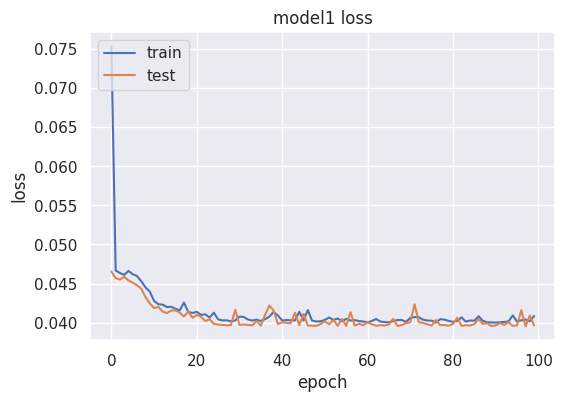

In [34]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

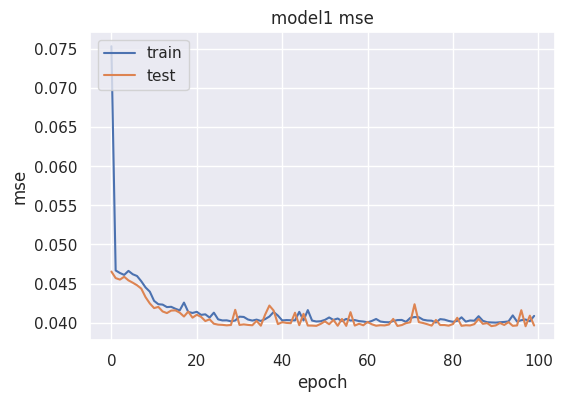

In [35]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()